# Context

I collect recent tweets about the COVID-19 vaccines used in entire world on large scale, as following:

    Pfizer/BioNTech;
    Sinopharm;
    Sinovac;
    Moderna;
    Oxford/AstraZeneca;
    Covaxin;
    Sputnik V.

# Data collection

The data is collected using tweepy Python package to access Twitter API. For each of the vaccine I use relevant search term (most frequently used in Twitter to refer to the respective vaccine)
Data collection frequency

Initial data was merged from tweets about Pfizer/BioNTech vaccine. I added then tweets from Sinopharm, Sinovac (both Chinese-produced vaccines), Moderna, Oxford/Astra-Zeneca, Covaxin and Sputnik V vaccines. The collection was in the first days twice a day, until I identified approximatively the new tweets quota and then collection (for all vaccines) stabilized at once a day, during morning hours (GMT).
Inspiration

You can perform multiple operations on the vaccines tweets. Here are few possible suggestions:

    Study the subjects of recent tweets about the vaccine made by various producers;
    Perform various NLP tasks on this data source (topic modelling, sentiment analysis);
    Using the COVID-19 World Vaccination Progress (where we can see the progress of the vaccinations and the countries where the vaccines are administered), you can study the relationship between the vaccination progress and the discussions in social media (from the tweets) about the vaccines.


In [76]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set_style(style ="white") 

In [77]:
# Load the data

# # Load the datasets, parsing relevant columns as dates
df = pd.read_csv("vaccination_all_tweets.csv", parse_dates=['user_created', 'date']) #, dayfirst=True) 
df.head(2)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False


In [78]:

# convert csv file to slx file 
import pandas as pd 
import numpy as np 

filename = 'vaccination_all_tweets'

csvfile = filename+".csv"
# read the scv file 
csvdf = pd.read_csv(csvfile)

# save it to excel file 
xlsxfile = filename+".xlsx" 
GFG = pd.ExcelWriter(xlsxfile)
csvdf.to_excel(GFG, index = False)
GFG.save()


In [6]:
# # Import libraries
# import pandas as pd
# import numpy as np

# # visualisation
# import seaborn as sns
# # import chart_studio.plotly as py
# import cufflinks as cf
# # import plotly.express as px
# # from plotly.subplots import make_subplots
# # import plotly.graph_objs as go
# import matplotlib.pyplot as plt 
# %matplotlib inline
# sns.set_style(style='white') 

# # #  to work offline in local computer
# # from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# # init_notebook_mode(connected=True)
# # cf.go_offline()

ModuleNotFoundError: No module named 'cufflinks'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156726 entries, 0 to 156725
Data columns (total 16 columns):
id                  156726 non-null int64
user_name           156725 non-null object
user_location       105731 non-null object
user_description    145843 non-null object
user_created        156726 non-null datetime64[ns]
user_followers      156726 non-null int64
user_friends        156726 non-null int64
user_favourites     156726 non-null int64
user_verified       156726 non-null bool
date                156726 non-null datetime64[ns]
text                156726 non-null object
hashtags            127190 non-null object
source              156607 non-null object
retweets            156726 non-null int64
favorites           156726 non-null int64
is_retweet          156726 non-null bool
dtypes: bool(2), datetime64[ns](2), int64(6), object(6)
memory usage: 17.0+ MB


* The data has bool(2), datetime(2), int64(6), object(6).

In [4]:
# look at the missing values
df.isnull().sum()

id                      0
user_name               1
user_location       50995
user_description    10883
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            29536
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

* The data has a lot of missing values in the 'hashtags', 'user_location' and 'user_description' features. And some missing values also in 'source' feature and 'user_name'

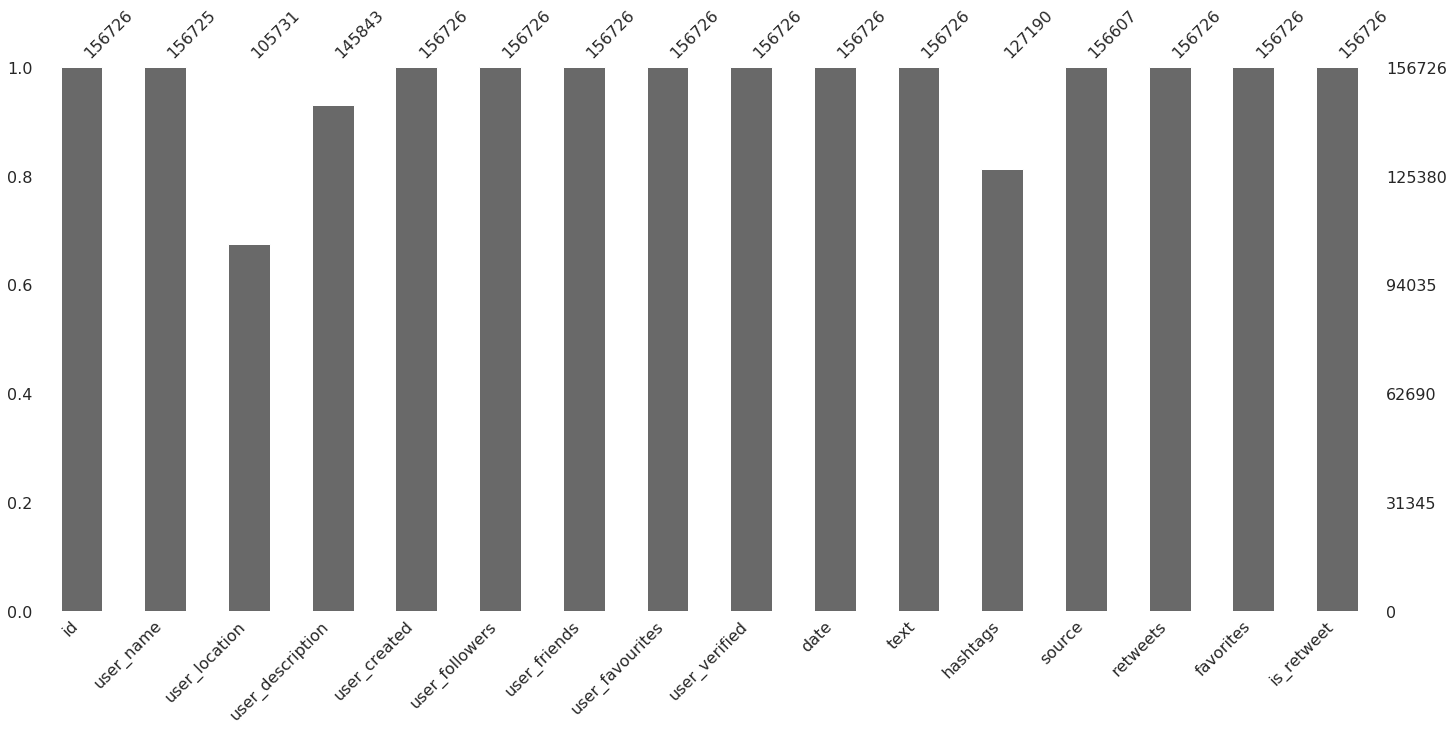

In [5]:
# look at the percentage of missing values
import missingno as msno
msno.bar(df);

# Create new features in the data from 'date'


In [6]:
df['date'].dt.year.unique()

array([2020, 2021])

* The data was collected from 2020 to 2021

In [7]:
df['date_sent'] = df['date'].dt.date # date of sent tweets
df['time_sent'] = df['date'].dt.time # time of sending tweet
df['day_sent'] = df['date'].dt.strftime('%a')
df['year_sent'] = df['date'].dt.year
df['month_sent'] = df['date'].dt.strftime('%b')
df['tweets_count'] = 1
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'date_sent', 'time_sent', 'day_sent', 'year_sent',
       'month_sent', 'tweets_count'],
      dtype='object')

# Visualization & EDA

In [26]:
# look if we have duplicated rows in the data
df.duplicated().sum()


0

* We have no duplicated rows in the data


In [27]:
# look for duplicated id
df['id'].duplicated().sum()
# no duplicated id in the data

0

In [47]:
df.head(2)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,retweets,favorites,is_retweet,date_sent,time_sent,day_sent,month_sent,tweets_count
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020-12-20,06:06:44,Sunday,12,1
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,...,NaN,Twitter Web App,1,1,False,2020-12-13,16:27:13,Sunday,12,1


##  Tweets based on user_location 

In [26]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'date_sent', 'time_sent', 'day_sent', 'year_sent',
       'month_sent', 'tweets_count'],
      dtype='object')

In [27]:
df.shape

(156726, 22)

In [46]:
df2020 = df.loc[df['year_sent'] ==2020]
df2021 = df.loc[df['year_sent'] ==2021]

groupedby_date2020 = df2020.groupby('date_sent').sum().reset_index()
groupedby_date2021= df2021.groupby('date_sent').sum().reset_index()

print(df2020.shape,groupedby_date2020.shape, groupedby_date2021.shape)


(1980, 22) (20, 11) (192, 11)


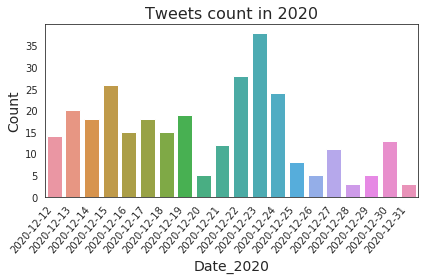

In [52]:
sns.set_style(style='white') 
ax = sns.barplot(y ='user_verified',
                 x = 'date_sent', 
                 data=groupedby_date2020
                ) 
ax.set(ylabel='Count', xlabel="Date_2020", )
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")

# plt.title('Tweets count in 2020')
ax.axes.set_title("Tweets count in 2020",fontsize=16)
ax.set_xlabel("Date_2020",fontsize=14)
ax.set_ylabel("Count",fontsize=14)

plt.tight_layout()
plt.savefig('tweet_2020_for_user_verified.png', bbox_inches='tight',transparent=True, pad_inches=0)

plt.show()


* The tweet in 2020 was only in the month of December recorded

In [48]:
# group 2021 per same months

m2021 = groupedby_date2021[['date_sent', 'user_verified']]
m2021['date_sent'] = pd.to_datetime(m2021['date_sent'])


In [49]:
m2021['month'] = m2021['date_sent'].dt.strftime('%b') #dt.month
# group per same month in the same year
m2021_groupMonth = m2021.groupby('month').sum().reset_index()


In [50]:
# sort to hae bar plot sorted
m2021_groupMonth = m2021_groupMonth.sort_values(by = 'user_verified', ascending=False)

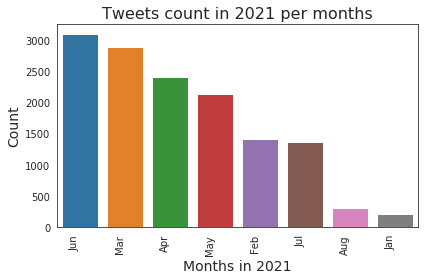

In [51]:
sns.set_style(style='white') 
ax = sns.barplot(y ='user_verified',
                 x = 'month', 
                 data=m2021_groupMonth
                ) 
# ax.set(ylabel='Count', xlabel="Months in 2021", )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# plt.title('Tweets count in 2021 per months')
ax.axes.set_title("Tweets count in 2021 per months",fontsize=16)
ax.set_xlabel("Months in 2021",fontsize=14)
ax.set_ylabel("Count",fontsize=14)

plt.tight_layout()
plt.savefig('tweet_2021_for_user_verified.png', bbox_inches='tight',transparent=True, pad_inches=0)

plt.show()

* People tweets more in Jun

# tweets per location

In [546]:
# Run this once only
# df['user_location']= df['user_location'].replace('New Delhi', 'New Delhi, India')
#

In [53]:
Top10_regions = pd.DataFrame(df['user_location'].dropna().value_counts().sort_values(ascending=False)[:20]).reset_index()

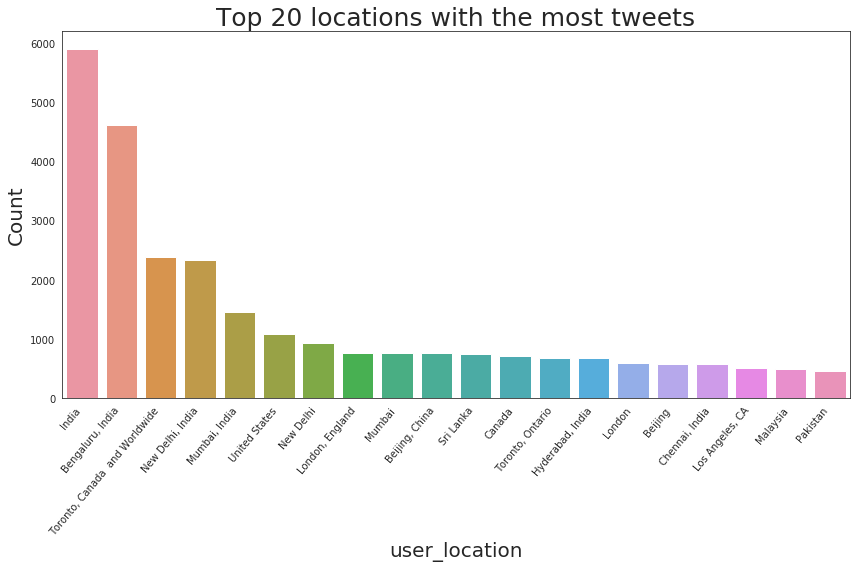

In [79]:
sns.set_style(style='white') 
plt.figure(figsize=(12,8))

ax = sns.barplot(y='user_location',
                 x = 'index', 
                 data=Top10_regions,
                ) 
# ax.set(ylabel='Count', xlabel="user_location")
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")

ax.axes.set_title("Top 20 locations with the most tweets",fontsize=25)
ax.set_xlabel("user_location",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.tight_layout()
plt.savefig('tweet_location.png', bbox_inches='tight',transparent=True, pad_inches=0)
plt.show()


# Words the most commond used in the tweets in general.

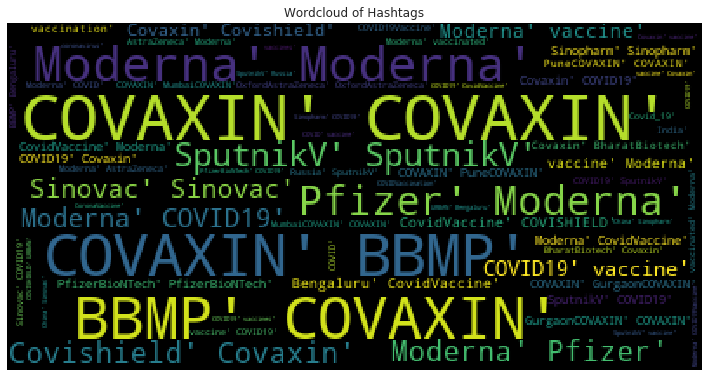

In [564]:
# PLot a Words cloud

# !pip install wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


htext= ' '.join(df.hashtags.dropna())  # we remove the missing values first

wordcloud_build = WordCloud().generate(htext)
# Generate plot

plt.figure(figsize=(10,8))

plt.imshow(wordcloud_build)
plt.axis("off")

plt.title('Wordcloud of Hashtags')
plt.tight_layout()
plt.savefig('WordCloud_hashtags.png', max_words=100, width=200, height=200, bbox_inches='tight',transparent=True, pad_inches=0)
plt.show()

The bigger the word is the more spoken it is.
* We notice that people hashtag more  about the topic " COVAXIN', "BBMP', 'pfizer', "Moderna"
* That might let us thing that those are the favorite amount people or the less favorite.

## Look at the word cloud per years  to see if the conversation have changed with time or not. 

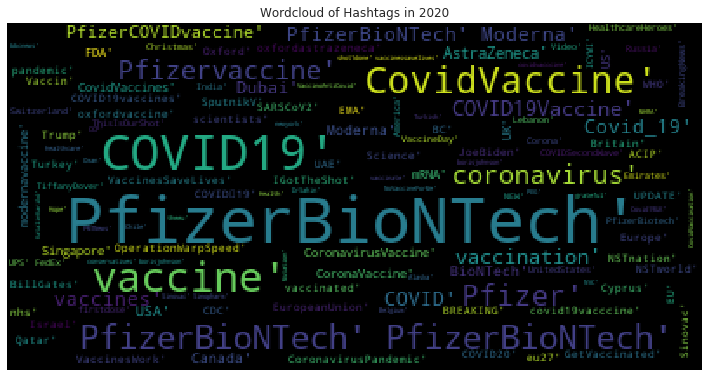

In [563]:
# in 2020
htext2020= ' '.join(df2020.hashtags.dropna())  # we remove the missing values first

wordcloud_build2020 = WordCloud().generate(htext2020)
# # Generate plot

plt.figure(figsize=(10,8))
plt.imshow(wordcloud_build2020)
plt.axis("off")

plt.title('Wordcloud of Hashtags in 2020')
plt.tight_layout()
plt.savefig('WordCloud_hashtags_2020.png',max_words=100, width=200, height=200, bbox_inches='tight',transparent=True, pad_inches=0)
plt.show()

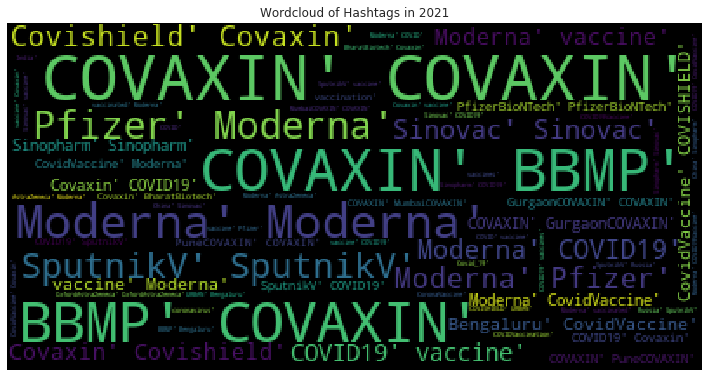

In [562]:
# in 2021
htext2021= ' '.join(df2021.hashtags.dropna())  # we remove the missing values first

wordcloud_build2021 = WordCloud().generate(htext2021)
# # Generate plot

plt.figure(figsize=(10,8))
plt.imshow(wordcloud_build2021)
plt.axis("off")

plt.title('Wordcloud of Hashtags in 2021')
plt.tight_layout()
plt.savefig('WordCloud_hashtags_2021.png',  max_words=100, width=200, height=200,bbox_inches='tight',transparent=True, pad_inches=0)
plt.show()

* We see that from 2020 and 2021, the word most tweet are not exactly the same.
* In 2020, people tweeted more about  'PfizerBioNtech', 'COVID19', 'Moderna','Covidvacine'
* In 2021 'BBMP', 'COVAXIN', 'Moderna','Sputnikt'

# Words could of tweets

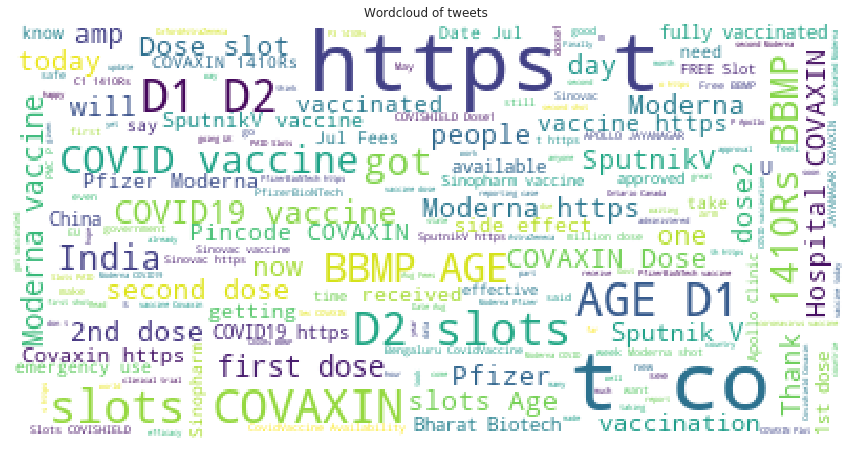

In [568]:
# in 2021
twtext= ' '.join(df['text'].dropna())  # we remove the missing values first

wordcloud_build_text = WordCloud(background_color='white',max_font_size = 40).generate(twtext)
# # # Generate plot

plt.figure(figsize=(12,8))
plt.imshow(wordcloud_build_text)
plt.axis("off")

plt.title('Wordcloud of tweets')
plt.tight_layout()
plt.savefig('WordCloud_of_tweets.png',max_words=100, width=200, height=200,  bbox_inches='tight',transparent=True, pad_inches=0)
plt.show()


# ##------------
#change the value in return to set the single color need, in hsl format.
# def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
#     return("hsl(230,100%%, %d%%)" % np.random.randint(49,51))

# #create the wordcloud object
# wordcloud = WordCloud(background_color='white',max_font_size = 50).generate(twtext)

# #change the color setting
# wordcloud.recolor(color_func = grey_color_func)

# Text Analysis: Sentiment analysis 

In [55]:
# Load libraries

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk.tokenize import word_tokenize , sent_tokenize

# from nltk.stem.porter import PorterStemmer

# from PIL import Image
# import requests
# from io import BytesIO
# from wordcloud import ImageColorGenerator
## !pip install textblob
from textblob import TextBlob


In [56]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/stanardmp/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

* https://predictivehacks.com/how-to-run-sentiment-analysis-in-python-using-vader/
* https://textblob.readthedocs.io/en/dev/

In [57]:
sid = SentimentIntensityAnalyzer()

# select the negative and positive tweet about the topic

df['sentiment_vader'] = df['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['sentiment_textblob'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)


 
# Top 15 negative tweets 


In [58]:
df.sort_values(by = 'sentiment_textblob')[['user_name', 'text', 
                                           'sentiment_vader', 
                                           'sentiment_textblob']].head(15)


,user_name,text,sentiment_vader,sentiment_textblob
44823,Magenta Q 🦸🏾,Let the #Moderna #seconddose chronicles begin....,0.1280,-1.0
12857,"Kristina Lang, BA, MS.",Moderna #2 is done! 💉 So blessed to be fully v...,-0.3013,-1.0
12855,RT,#Pfizer and #Moderna will ramp up vaccine prod...,-0.5719,-1.0
65604,Gurjot,Worst decision ever by govt to charge for vacc...,-0.6249,-1.0
47840,Susan Hemann,Has anyone noticed a terrible taste in their m...,-0.4767,-1.0
24966,Ape,@CNN @ChrisCuomo @donlemon Help! Canada has g...,-0.5575,-1.0
65333,BKD,Beware!\n#terrible\n#accountability\n#CSK #dho...,0.0000,-1.0
42672,Luke,Know the #truth about the #moderna and #pfizer...,-0.5267,-1.0
139876,Jim Warholic,Are you noticing the pattern yet? 💯 It's the J...,-0.6900,-1.0
66079,Sri Sri Mumbaitiger,Spread ro anyone who is afraid of taking vacci...,0.0000,-1.0


# Top 15 positive tweets

In [59]:
#Positive Tweets
df.sort_values(by = 'sentiment_textblob', ascending = False)[['user_name', 
                                                              'text', 
                                                              'sentiment_vader', 
                                                              'sentiment_textblob']].head(15)


,user_name,text,sentiment_vader,sentiment_textblob
10760,Ramon Glenn,They have the @KremlinRussia_E #SputnikV tha...,0.5951,1.0
41045,StackDesign Automatn,Multilayer masks provide the best defense agai...,0.7177,1.0
105973,Stephanie Wilkinson,Hunger Games-esque race to find a vaccine faci...,0.7430,1.0
3813,staffnursemiller,Day 3 post Covid vaccine and I feel great! Loo...,0.6892,1.0
40540,Timestrip HQ,Vaccines are ineffective if not transported an...,0.5719,1.0
76880,Dr Musharraf Husain,"Which is the Best Covid Vaccine, difference be...",0.6369,1.0
122897,CytomolLabs,HAPPY DOCTORS DAY!\nWebsite: https://t.co/JkWm...,0.6932,1.0
1055,Andrew Mseri CEO,Already vaccinated or getting vaccine soon? Pl...,0.6369,1.0
106077,(((Sarah Wilson))),Best production yet at the @eicc Thank you @NH...,0.7717,1.0
81253,Amit,Can anyone guide or send a link to give clarit...,0.7845,1.0


# Top 15 neutral tweets

In [60]:
#Neutral Tweets
df[df['sentiment_textblob'] == 0.0][['user_name', 
                                         'text', 
                                         'sentiment_vader', 
                                         'sentiment_textblob']].head(15)


,user_name,text,sentiment_vader,sentiment_textblob
0,Rachel Roh,Same folks said daikon paste could treat a cyt...,0.4019,0.0
2,eli🇱🇹🇪🇺👌,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.2500,0.0
4,Citizen News Channel,Explain to me again why we need a vaccine @Bor...,0.0000,0.0
8,Erin Despas,Covid vaccine; You getting it?\n\n #CovidVacci...,0.0000,0.0
9,Ch.Amjad Ali,#CovidVaccine \n\nStates will start getting #C...,0.0000,0.0
13,Dr.Krutika Kuppalli,For all the women and healthcare providers who...,0.4215,0.0
14,Opoyi,"""Expect 145 sites across all the states to rec...",0.0000,0.0
16,STOPCOMMONPASS.ORG,UPDATED: #YellowFever &amp; #COVID19 #Immunity...,0.0000,0.0
21,"Richard Dunne, MD",Anyone wondering why day after #PfizerBioNTech...,0.2617,0.0
23,BOOM Live,The US Food and Drug Administration (FDA) has ...,-0.1531,0.0


In [61]:
#Combining all Dataframes (Positive, Neutral and Negative) and visualising the results...
neutral = df[df['sentiment_textblob'] == 0.0]
positive = df[df['sentiment_textblob'] > 0.0]
negative = df[df['sentiment_textblob'] < 0.0]

neutral['Sentiment Category'] = 'Neutral'
positive['Sentiment Category'] = 'Positive'
negative['Sentiment Category'] = 'Negative'

frames = [neutral, positive, negative]
result = pd.concat(frames)



In [62]:
result.keys()

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'date_sent', 'time_sent', 'day_sent', 'year_sent',
       'month_sent', 'tweets_count', 'sentiment_vader', 'sentiment_textblob',
       'Sentiment Category'],
      dtype='object')

In [63]:
result['Sentiment Category'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [64]:
# sns.set_style(style='white') 
# sns.catplot(x='Sentiment Category', 
#             hue='Sentiment Category', 
#             kind="count",
#             palette="pastel", 
#             edgecolor=".6",
#             data=result);


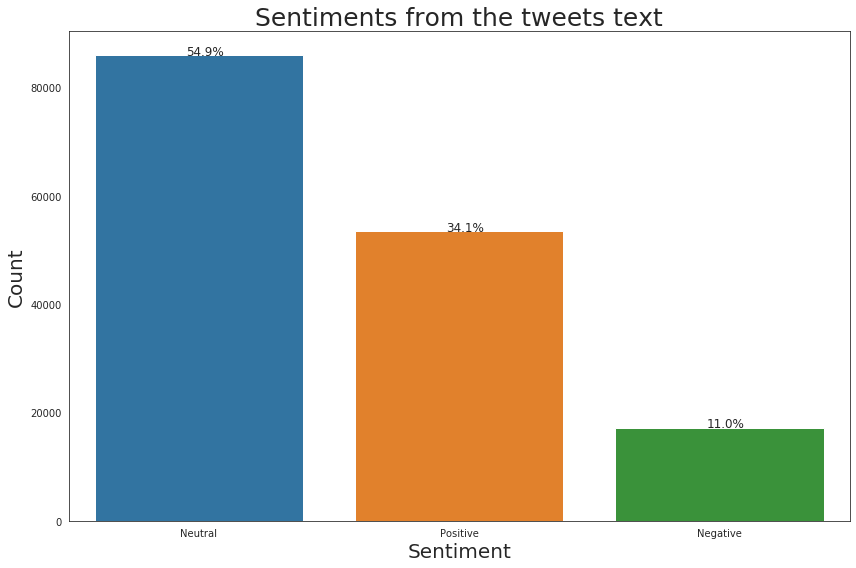

In [65]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
#     plt.show()
    
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
#     plt.show()


    
sns.set_style(style='white') 
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Sentiment Category', 
#                     hue='Sentiment Category', 
                    data = result,)


# ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.axes.set_title("Sentiments from the tweets text",fontsize=25)
ax.set_xlabel("Sentiment",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.tight_layout()
without_hue(ax, result['Sentiment Category'])
plt.savefig('Sentiment_tweets.png', bbox_inches='tight',transparent=True, pad_inches=0)
plt.show()


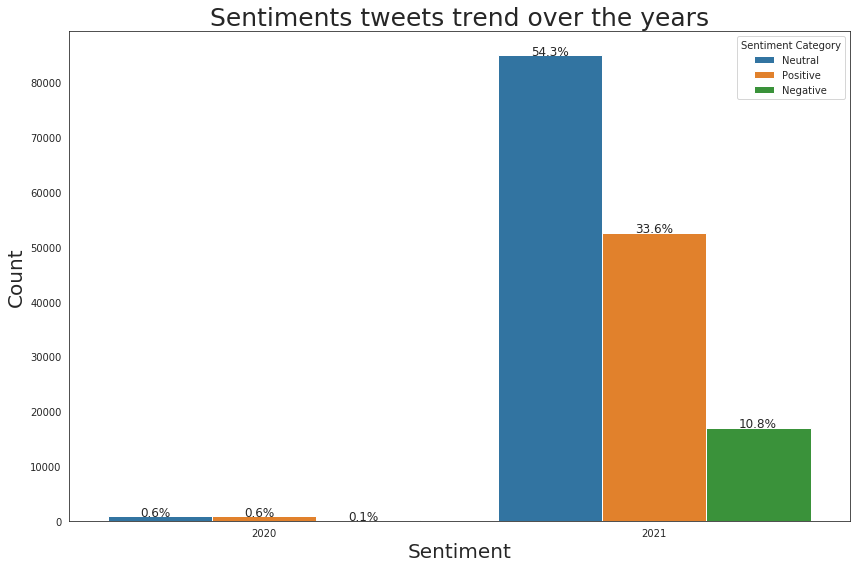

In [69]:
# Per years
sns.set_style(style='white') 
plt.figure(figsize=(12,8))
ax = sns.countplot(x='year_sent', #'Sentiment Category', 
                    hue='Sentiment Category', 
                    data = result,)


# ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.axes.set_title("Sentiments tweets trend over the years",fontsize=25)
ax.set_xlabel("Sentiment",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.tight_layout()
without_hue(ax, result['Sentiment Category'])
plt.savefig('Sentiment_tweets_per_years.png', bbox_inches='tight',transparent=True, pad_inches=0)
plt.show()


In [74]:
results2021 = result.loc[result['year_sent'] ==2021]
results2021.year_sent.unique()

array([2021])

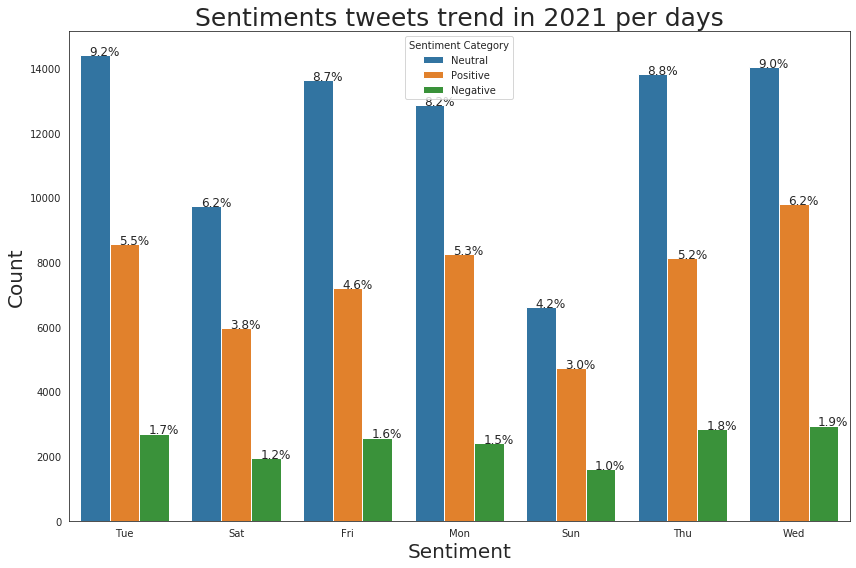

In [77]:
# Per years
sns.set_style(style='white') 
plt.figure(figsize=(12,8))
ax = sns.countplot(x='day_sent', #'Sentiment Category', 
                    hue='Sentiment Category', 
                    data = results2021,)


# ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.axes.set_title("Sentiments tweets trend in 2021 per days",fontsize=25)
ax.set_xlabel("Sentiment",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.tight_layout()
without_hue(ax, result['Sentiment Category'])
plt.savefig('Sentiment_tweets_2021_per_days.png', bbox_inches='tight',transparent=True, pad_inches=0)
plt.show()


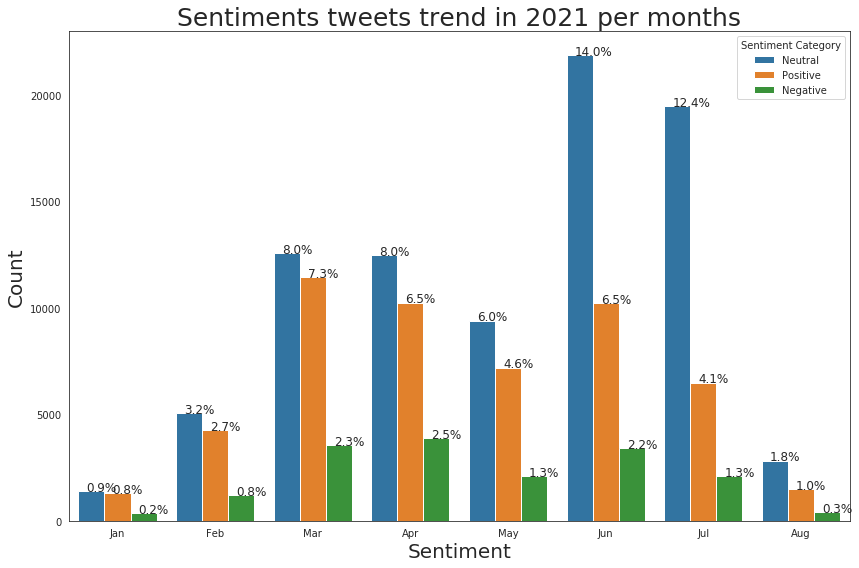

In [78]:
# Per years
sns.set_style(style='white') 
plt.figure(figsize=(12,8))
ax = sns.countplot(x='month_sent', #'Sentiment Category', 
                    hue='Sentiment Category', 
                    data = results2021,)


# ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.axes.set_title("Sentiments tweets trend in 2021 per months",fontsize=25)
ax.set_xlabel("Sentiment",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.tight_layout()
without_hue(ax, result['Sentiment Category'])
plt.savefig('Sentiment_tweets_2021_per_months.png', bbox_inches='tight',transparent=True, pad_inches=0)
plt.show()


# The 5 most tweeted word per 10 location with most tweets ??

In [446]:
# count each words per region in the data
# count the number of occurence of a word in a text

# df['text'].isnull().sum()   # No missing values

def counting_words(text):
    ''' This for each text i.e. for each user text'''
    lst_words = text.split(' ') #df['text'][0].split(' ')  # split in separate words
    count = dict()
    for w in lst_words:
        count[w] = count.get(w, 0) +1 

    # sorted(count)[:3]  # sort the dictionary by valuess
    # Take only those in the dictionary
    s =  {k: count[k] for k in sorted(count)[:2]}
    return s

text_words_count = list()
for t in df['text']:
    s = counting_words(t)
    text_words_count.append(s)
df['text_words_count'] = text_words_count
# df[['text', 'text_words_count']]

In [455]:
# # Look at the 10 most tweets location 
# locations10 =Top10_regions['index'].tolist()
# df_top10_location = df.loc['India','Bengaluru, India']#locations10]
# df_top10_location
# # locations10

# d = df.loc[df['user_location']=='india']
# d['text_words_count']

In [457]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'date_sent', 'time_sent', 'day_sent', 'year_sent',
       'month_sent', 'tweets_count', 'text_words_count'],
      dtype='object')

# top 10 verified users that have the most followers


In [475]:
# # df[['user_verified', 'user_followers']]
# # verified users
# df_ver = df.loc[df['user_verified']==True]
# df_ver20 = df_ver.sort_values(by='user_followers', axis='rows',  ascending=False).head(20)
# # df_ver10

In [477]:
# df_ver20.user_location.unique()
# Plot users that have the most followers per location


array(['India'], dtype=object)

* 20 top users tweets from india

# Top 10 sources of tweets

In [488]:
Top10_source = pd.DataFrame(df['source'].value_counts().sort_values(ascending = False)[:10].reset_index())

In [492]:
Top10_source.columns

Index(['index', 'source'], dtype='object')

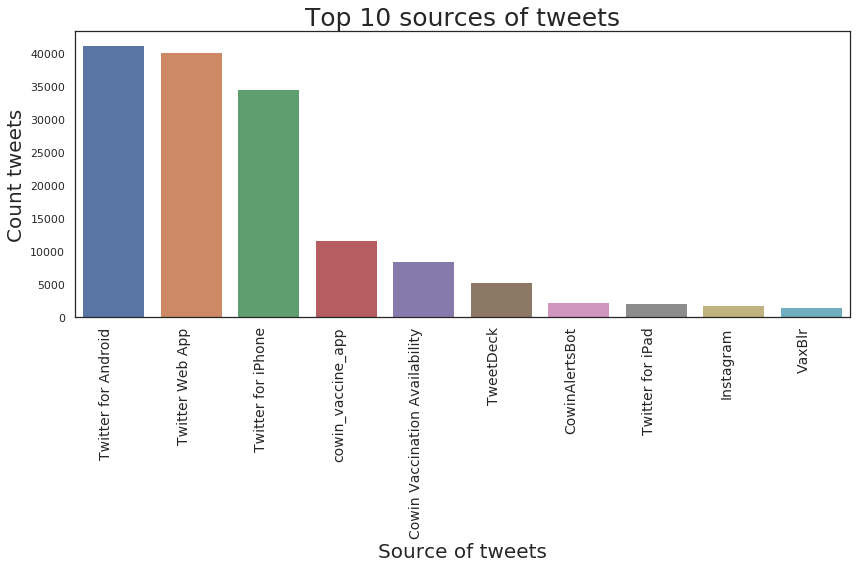

In [689]:

plt.figure(figsize=(12,8))

ax = sns.barplot(y ='source',
                 x = 'index', 
                 data = Top10_source,
                ) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=14)

ax.axes.set_title("Top 10 sources of tweets",fontsize=25)
ax.set_xlabel("Source of tweets",fontsize=20)
ax.set_ylabel("Count tweets",fontsize=20)
plt.tight_layout()
plt.savefig('Top10_source_tweets.png', bbox_inches='tight',transparent=True, pad_inches=0)
plt.show()




* People tweets more from their smart device.. Android, app, iphone, covin_vaccine_app

# Look at retwee per location

In [80]:
# plot scatter plot with label 
df.columns 

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'date_sent', 'time_sent', 'day_sent', 'year_sent',
       'month_sent', 'tweets_count', 'sentiment_vader', 'sentiment_textblob'],
      dtype='object')

In [102]:
# take only the user_verified
df_ver = df.loc[df['user_verified'] ==True]

# group per same user_name
df_group_name = df_ver.groupby('user_name').sum().reset_index()
# df_group_name.head()


# Top  users with the most followers 
df_followers = df_group_name.sort_values(by = 'user_followers',axis = 'rows',ascending=False)
df_followers.head(10)

,user_name,id,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,is_retweet,year_sent,tweets_count,sentiment_vader,sentiment_textblob
807,Hindustan Times,3.877373e+20,2.230448e+09,37210.0,811296.0,277.0,1904.0,12203.0,0.0,559817.0,277.0,22.8579,23.772893
326,CGTN,1.905900e+20,1.878222e+09,9675.0,22449.0,138.0,3206.0,9676.0,0.0,278897.0,138.0,9.0809,10.022879
1365,NDTV,1.634713e+20,1.811420e+09,1737.0,4.0,117.0,1860.0,15757.0,0.0,236457.0,117.0,8.8292,10.777579
1577,"People's Daily, China",2.596107e+20,1.311768e+09,821854.0,199828.0,188.0,2878.0,9562.0,0.0,379948.0,188.0,13.5785,12.147735
896,IndiaToday,2.938451e+20,1.192838e+09,52553.0,937387.0,211.0,2317.0,9727.0,0.0,426430.0,211.0,14.2135,23.116782
2071,The Hindu,1.237642e+20,6.119354e+08,18787.0,13652.0,89.0,1770.0,11278.0,0.0,179866.0,89.0,3.0928,6.123772
2000,TIMES NOW,7.486044e+19,5.321344e+08,20087.0,265.0,53.0,467.0,2790.0,0.0,107113.0,53.0,7.6998,3.923611
316,Business Standard,2.561735e+20,3.863385e+08,70633.0,35173.0,184.0,642.0,3011.0,0.0,371863.0,184.0,11.1617,10.605673
2283,Zee News English,9.223811e+19,3.580678e+08,2786.0,67.0,66.0,528.0,3638.0,0.0,133386.0,66.0,3.0035,4.034848
1645,RT,1.549499e+20,3.347337e+08,76295.0,213245.0,112.0,2299.0,4850.0,0.0,226351.0,112.0,3.6206,10.048687


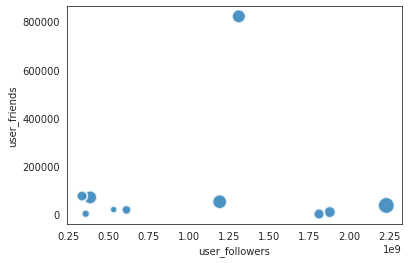

In [128]:
sns.scatterplot(y ='user_friends',
                x ='user_followers',
                data = df_followers.head(10),
#                size="user_friends",
                sizes=(20,50),
                s=df_followers['tweets_count'],
               alpha=0.8,
#                 hue="user_name",
#                edgecolors="grey", 
                linewidth=2);

14107

# Are those who follower users are friend of not? look at the correlation

## Question we might be interested to takkle

* 1.  Given the list of vacine, which one is/was the most popular during the time frame of taking those data?.... look at the user favorite vacine
* 2.  Look at the first date of administration of each vacine
* 3. Look at the time gap between the administration of the two shut of vaccine
* 4. The most commun words in the tweet and thier frequency of appearance
* 5. Look at the 10 users that have the most followers... They are the leads
* 6. use the location info to look at the tweets perregions... Which region has the most tweets?
* 7. How long before the first user account creationg before the user start having followers?
* 8. Look closely at the 10 tweet leader (Those having the most follower, ) Check what is their major tweet about.
* 9. How many 'hashtags' each user has?
* 10. Check if any of the name of those vaccine appear in the text, and in which frequency?


#### We can work those questions in any order, not particular order in required, and more questions might rise as we start exploring the data deeply

##  Look at the evolution of tweets per years, months in each year and days in each months per years

* 'date' is the date of the tweets 
* 'user_created'  is the date of the tweeter account creation

* https://www.kaggle.com/kaushiksuresh147/covid-vaccine-eda

In [21]:
#  look at the text 
text.to_csv('tweets.csv')

In [33]:
dt = pd.read_csv('tweets.csv')
dt.head()

,Unnamed: 0,text
0,0,Same folks said daikon paste could treat a cyt...
1,1,While the world has been on the wrong side of ...
2,2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,3,"Facts are immutable, Senator, even when you're..."
4,4,Explain to me again why we need a vaccine @Bor...


# clean the text

In [50]:
# Load necessary libvraries
import nltk 
import re 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup 



In [71]:
# we can now apply the clean text on our whole data using the prewriten function

# Load necessary libvraries
import nltk
nltk.download('stopwords')  
import re 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup 

nltk.download('wordnet')

# write a function that clean the text 
def text_cleaning(text):
#     text = str(text)
    
#     # lower character
    text1 = text.lower()
    
#     # remmover Html
    text2 = text1.replace('{html}', " ")
    
#     # Remove special characters
    cleanr = re.compile('<,*?')
    text3 = re.sub(cleanr, '', text2)
    
#     # Remover numbers
    text4 = re.sub('[0-9]+', '', text3)
    
#     # tokenized the text
    tokenizer = RegexpTokenizer(r'\w+')
    tokens =  tokenizer.tokenize(text4)
    
#     #  remove stop words from the tokenized text
    filtered_words = [w for w in tokens if len(w)>2 if not w in stopwords.words('english')]
    
#     # Lematisation 
    lemma_words = [WordNetLemmatizer().lemmatize(w) for w in filtered_words] 
    
#     # join all the words back into a cleaned text
    join_words  = ' '.join(lemma_words)
    
    # return the cleaned text
    return join_words

dt['cleaned_text']= dt['text'].map(lambda s : text_cleaning(str(s)))
dt.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mpsta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mpsta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,text,cleaned_text
0,0,Same folks said daikon paste could treat a cyt...,folk said daikon paste could treat cytokine st...
1,1,While the world has been on the wrong side of ...,world wrong side history year hopefully bigges...
2,2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,coronavirus sputnikv astrazeneca pfizerbiontec...
3,3,"Facts are immutable, Senator, even when you're...",fact immutable senator even ethically sturdy e...
4,4,Explain to me again why we need a vaccine @Bor...,explain need vaccine borisjohnson matthancock ...


In [75]:
dt.cleaned_text

0         folk said daikon paste could treat cytokine st...
1         world wrong side history year hopefully bigges...
2         coronavirus sputnikv astrazeneca pfizerbiontec...
3         fact immutable senator even ethically sturdy e...
4         explain need vaccine borisjohnson matthancock ...
                                ...                        
156721    bbmp bengaluru covidvaccine availability free ...
156722    urban bengaluru covidvaccine availability free...
156723                     rst dosis sputnikv http blovrujg
156724    mysterymeep bnodesk sputnikv novavax curevac s...
156725    bbmp bengaluru covidvaccine availability free ...
Name: cleaned_text, Length: 156726, dtype: object

In [73]:
dt.to_csv('cleaned_tweets.csv')


In [74]:

# convert csv file to slx file 
import pandas as pd 
import numpy as np 

filename = 'cleaned_tweets' #'tweets'#'vaccination_all_tweets'

csvfile = filename+".csv"
# read the scv file 
csvdf = pd.read_csv(csvfile)

# save it to excel file 
xlsxfile = filename+".xlsx" 
GFG = pd.ExcelWriter(xlsxfile)
csvdf.to_excel(GFG, index = False)
GFG.save()
